<a href="https://colab.research.google.com/github/bharat-mullapudi/LSTM_SOC_RUL/blob/main/Dec18_att2dec17R3implementation_1_SOC_LSTM_CALCE_IC2_45deg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns


In [4]:
df = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/calce_incremental_INR_18650-20R/Incremental_temp_45.xlsx')

In [5]:
df

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000502,1.0,0.0,4.173664,0.0,0.0,1,0.97
1,20.016109,1.0,0.0,4.173664,0.0,0.0,10.0156,0.984508
2,30.031595,1.0,0.0,4.173826,0.0,0.0,10.0155,0.984604
3,40.047191,1.0,0.0,4.173826,0.0,0.0,10.0156,0.984604
4,50.062737,1.0,0.0,4.173826,0.0,0.0,10.0155,0.984604
...,...,...,...,...,...,...,...,...
1048568,NaN,NaN,NaN,NaN,NaN,NaN,,
1048569,NaN,NaN,NaN,NaN,NaN,NaN,,
1048570,NaN,NaN,NaN,NaN,NaN,NaN,,
1048571,NaN,NaN,NaN,NaN,NaN,NaN,,


In [6]:
df=df.dropna()

In [7]:
combined_data=df

In [8]:
combined_data.to_csv('Incremental_Init_45.csv')
combined_data=pd.read_csv('Incremental_Init_45.csv')

In [9]:
combined_data.describe()

,Unnamed: 0,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
count,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000
mean,79553.000000,87279.243341,10.493090,0.000390,3.735026,0.568921,1.542466,1.054046,0.722902
std,45930.378977,46456.798733,5.747789,0.295084,0.231053,0.687331,0.616400,0.621824,0.134872
min,0.000000,10.000502,1.000000,-1.000233,3.033892,0.000000,0.000000,0.000435,0.314054
25%,39776.500000,47094.959959,5.000000,0.000000,3.578578,0.014028,0.999794,1.000212,0.633599
50%,79553.000000,87297.368555,11.000000,0.000000,3.678893,0.138467,1.999575,1.015569,0.693371
75%,119329.500000,127494.672648,16.000000,0.000000,3.946941,1.213525,1.999575,1.015621,0.850189
max,159106.000000,167715.033539,19.000000,1.001522,4.328594,2.028843,1.999575,10.017457,1.000000


In [ ]:
###
combined_data=combined_data.drop_duplicates()
#combined_data.set_index('Data_Point',inplace=True)
#cd2=combined_data.drop(63990)
#cdcombined_data.drop(127979)

#cd2=combined_data;

In [10]:
combined_data

,Unnamed: 0,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,0,10.000502,1.0,0.0,4.173664,0.000000,0.000000,1.000000,0.970000
1,1,20.016109,1.0,0.0,4.173664,0.000000,0.000000,10.015606,0.984508
2,2,30.031595,1.0,0.0,4.173826,0.000000,0.000000,10.015487,0.984604
3,3,40.047191,1.0,0.0,4.173826,0.000000,0.000000,10.015596,0.984604
4,4,50.062737,1.0,0.0,4.173826,0.000000,0.000000,10.015546,0.984604
...,...,...,...,...,...,...,...,...,...
159102,159102,167711.283616,19.0,0.0,4.176743,2.028843,1.999575,1.015685,0.986319
159103,159103,167712.283619,19.0,0.0,4.176581,2.028843,1.999575,1.000003,0.986224
159104,159104,167713.299187,19.0,0.0,4.176581,2.028843,1.999575,1.015567,0.986224
159105,159105,167714.314787,19.0,0.0,4.176581,2.028843,1.999575,1.015600,0.986224


In [11]:
combined_data=combined_data.iloc[:,1:] #drop first column
combined_data.shape
combined_data

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000502,1.0,0.0,4.173664,0.000000,0.000000,1.000000,0.970000
1,20.016109,1.0,0.0,4.173664,0.000000,0.000000,10.015606,0.984508
2,30.031595,1.0,0.0,4.173826,0.000000,0.000000,10.015487,0.984604
3,40.047191,1.0,0.0,4.173826,0.000000,0.000000,10.015596,0.984604
4,50.062737,1.0,0.0,4.173826,0.000000,0.000000,10.015546,0.984604
...,...,...,...,...,...,...,...,...
159102,167711.283616,19.0,0.0,4.176743,2.028843,1.999575,1.015685,0.986319
159103,167712.283619,19.0,0.0,4.176581,2.028843,1.999575,1.000003,0.986224
159104,167713.299187,19.0,0.0,4.176581,2.028843,1.999575,1.015567,0.986224
159105,167714.314787,19.0,0.0,4.176581,2.028843,1.999575,1.015600,0.986224


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
combined_data=combined_data.drop(columns=['Charge_Capacity(Ah)','Discharge_Capacity(Ah)','TimeDelta'])

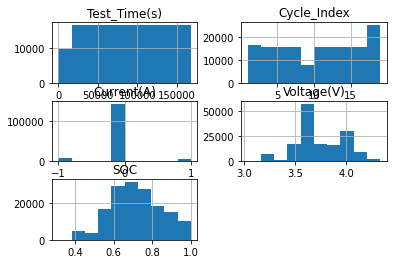

<Figure size 1440x1440 with 0 Axes>

In [13]:
combined_data.hist()
plt.figure(figsize=(20,20))
plt.show()

In [14]:
combined_data=combined_data.drop(columns=['Test_Time(s)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfbc00dd50>,
      dtype=object)

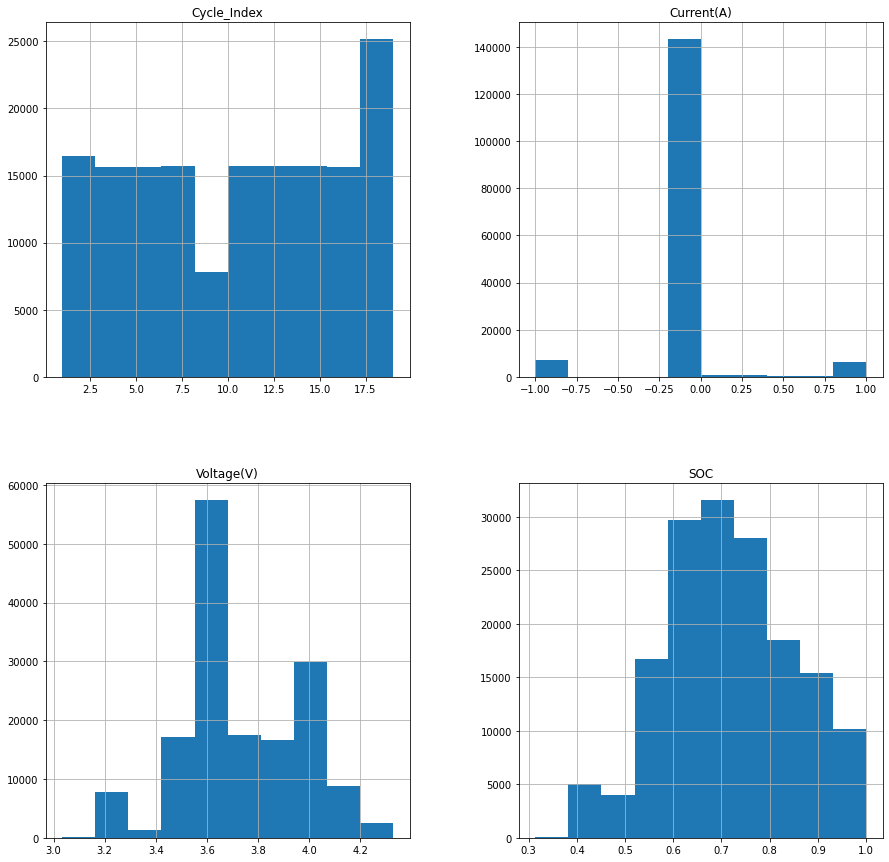

In [15]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

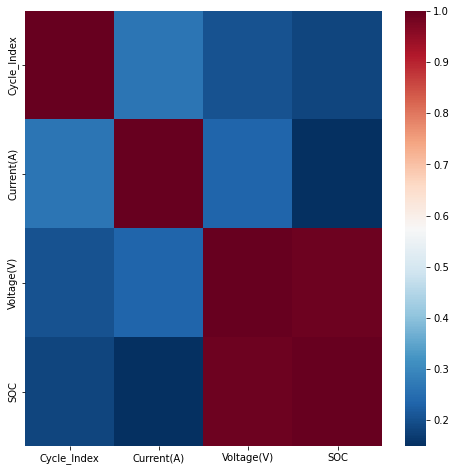

In [16]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [17]:
combined_data.describe()

,Cycle_Index,Current(A),Voltage(V),SOC
count,159107.000000,159107.000000,159107.000000,159107.000000
mean,10.493090,0.000390,3.735026,0.722902
std,5.747789,0.295084,0.231053,0.134872
min,1.000000,-1.000233,3.033892,0.314054
25%,5.000000,0.000000,3.578578,0.633599
50%,11.000000,0.000000,3.678893,0.693371
75%,16.000000,0.000000,3.946941,0.850189
max,19.000000,1.001522,4.328594,1.000000


Deleting 0 valued columns

In [18]:
#cd2=pd.read_csv('/content/drive/MyDrive/LSTM_SOC_Implementation/r1.csv')
cd2=combined_data
cd2.describe()

,Cycle_Index,Current(A),Voltage(V),SOC
count,159107.000000,159107.000000,159107.000000,159107.000000
mean,10.493090,0.000390,3.735026,0.722902
std,5.747789,0.295084,0.231053,0.134872
min,1.000000,-1.000233,3.033892,0.314054
25%,5.000000,0.000000,3.578578,0.633599
50%,11.000000,0.000000,3.678893,0.693371
75%,16.000000,0.000000,3.946941,0.850189
max,19.000000,1.001522,4.328594,1.000000


In [19]:
cd2

,Cycle_Index,Current(A),Voltage(V),SOC
0,1.0,0.0,4.173664,0.970000
1,1.0,0.0,4.173664,0.984508
2,1.0,0.0,4.173826,0.984604
3,1.0,0.0,4.173826,0.984604
4,1.0,0.0,4.173826,0.984604
...,...,...,...,...
159102,19.0,0.0,4.176743,0.986319
159103,19.0,0.0,4.176581,0.986224
159104,19.0,0.0,4.176581,0.986224
159105,19.0,0.0,4.176581,0.986224


In [20]:
y = cd2.SOC
X = cd2.drop(['SOC'], axis=1)

In [21]:
X.describe()

,Cycle_Index,Current(A),Voltage(V)
count,159107.000000,159107.000000,159107.000000
mean,10.493090,0.000390,3.735026
std,5.747789,0.295084,0.231053
min,1.000000,-1.000233,3.033892
25%,5.000000,0.000000,3.578578
50%,11.000000,0.000000,3.678893
75%,16.000000,0.000000,3.946941
max,19.000000,1.001522,4.328594


split

In [22]:
cd2.values

array([[ 1.        ,  0.        ,  4.17366409,  0.97      ],
       [ 1.        ,  0.        ,  4.17366409,  0.98450829],
       [ 1.        ,  0.        ,  4.17382622,  0.98460366],
       ...,
       [19.        ,  0.        ,  4.17658091,  0.98622406],
       [19.        ,  0.        ,  4.17658091,  0.98622406],
       [19.        ,  0.        ,  4.17658091,  0.98622406]])

In [23]:
from sklearn.preprocessing import MinMaxScaler


In [48]:
dataset = cd2.SOC.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [50]:
# reshape into X=t and Y=t+1
look_back = 3

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [51]:
X_train

array([[0.95626476, 0.97741554, 0.97755457],
       [0.97741554, 0.97755457, 0.97755457],
       [0.97755457, 0.97755457, 0.97755457],
       ...,
       [0.70224374, 0.70210471, 0.70224374],
       [0.70210471, 0.70224374, 0.70210471],
       [0.70224374, 0.70210471, 0.70210471]])

In [52]:
X_train.shape

(127281, 3)

In [53]:
Y_train.shape

(127281,)

In [54]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [55]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [56]:
model = Sequential()
#model.add(LSTM(,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50), ModelCheckpoint(filepath='best_model45.h5', monitor='val_loss', save_best_only=True)], verbose=1, shuffle=False)
#scores = model.evaluate(X_test, Y_test, verbose=1)
#print("Accuracy: %.2f%%" % (scores[1]*100))
# Training Phase
model.summary()

Epoch 1/100
1989/1989 [==============================] - 9s 4ms/step - loss: 0.0169 - val_loss: 9.1553e-04
Epoch 2/100
1989/1989 [==============================] - 6s 3ms/step - loss: 0.0010 - val_loss: 7.2694e-04
Epoch 3/100
1989/1989 [==============================] - 6s 3ms/step - loss: 6.8490e-04 - val_loss: 0.0012
Epoch 4/100
1989/1989 [==============================] - 6s 3ms/step - loss: 5.4454e-04 - val_loss: 0.0017
Epoch 5/100
1989/1989 [==============================] - 6s 3ms/step - loss: 4.4742e-04 - val_loss: 0.0015
Epoch 6/100
1989/1989 [==============================] - 6s 3ms/step - loss: 3.5081e-04 - val_loss: 0.0013
Epoch 7/100
1989/1989 [==============================] - 7s 4ms/step - loss: 2.6450e-04 - val_loss: 8.2222e-04
Epoch 8/100
1989/1989 [==============================] - 6s 3ms/step - loss: 2.0885e-04 - val_loss: 6.3312e-04
Epoch 9/100
1989/1989 [==============================] - 6s 3ms/step - loss: 1.7619e-04 - val_loss: 6.8278e-04
Epoch 10/100
1989/1989 [=

In [57]:
'''from keras.models import load_model
saved_model = load_model('best_model45.h5')
train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
test_acc = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))'''

Train: 0.001, Test: 0.001


In [58]:
# make predictions
saved_model = load_model('best_model45.h5')
train_predict = saved_model.predict(X_train)
test_predict = saved_model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.015778747107616366
Train Root Mean Squared Error: 0.019512803265306404
Test Mean Absolute Error: 0.014952282050284692
Test Root Mean Squared Error: 0.017199858247106726


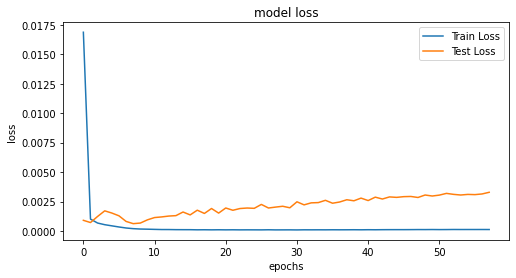

In [59]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

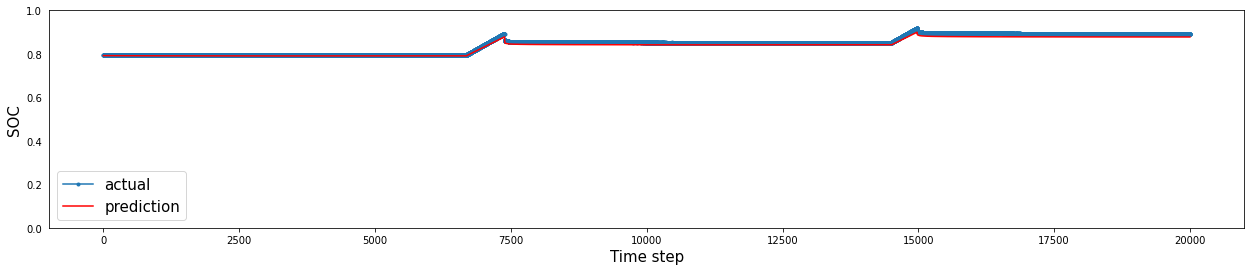

In [60]:
aa=[x for x in range(20000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_test[0][:20000], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:20000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

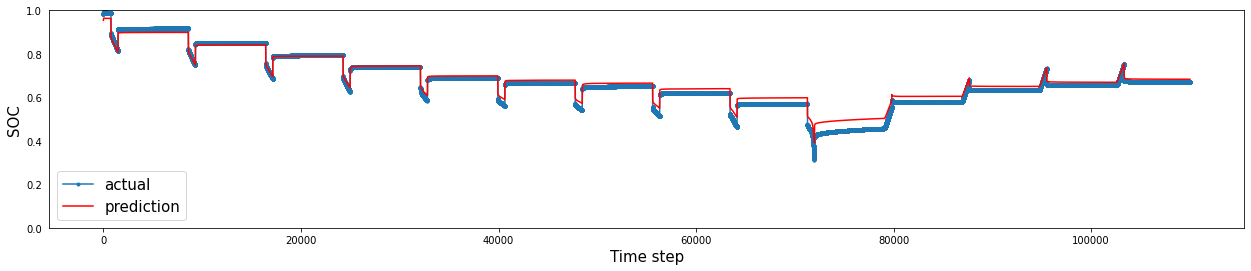

In [61]:
aa=[x for x in range(110000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_train[0][:110000], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:110000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();